# Phase 2: Exploratory Data Analysis (EDA)



**Objective**: Understand the data through visualization and summary statistics.

**Why is this important?**
Before building models, we must understand the relationships in our data.
- Which categories are most popular?
- Do paid apps have higher ratings?
- How does app size affect popularity?

We will perform:
1.  **Univariate Analysis**: Analyzing single variables (Histograms, Boxplots).
2.  **Bivariate Analysis**: Analyzing relationships between two variables (Scatter plots, Correlations).
3.  **Comparative Analysis**: Android vs iOS.
    


## 1. Import Libraries & Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def get_data_path(filename):
    possible_paths = [
        f"../output/{filename}",
        f"output/{filename}",
        f"/Users/jatinbisen/Desktop/Data_mining/output/{filename}"
    ]
    for path in possible_paths:
        if os.path.exists(path):
            return path
    return None

# Load cleaned data
google_df = pd.read_csv(get_data_path('google_cleaned.csv'))
apple_df = pd.read_csv(get_data_path('apple_cleaned.csv'))
combined_df = pd.read_csv(get_data_path('combined_cleaned.csv'))

print("Data loaded.")


Data loaded.


## 2. Univariate Analysis


### 2.1 Rating Distribution


Are most apps good or bad? Let's check the distribution of ratings.


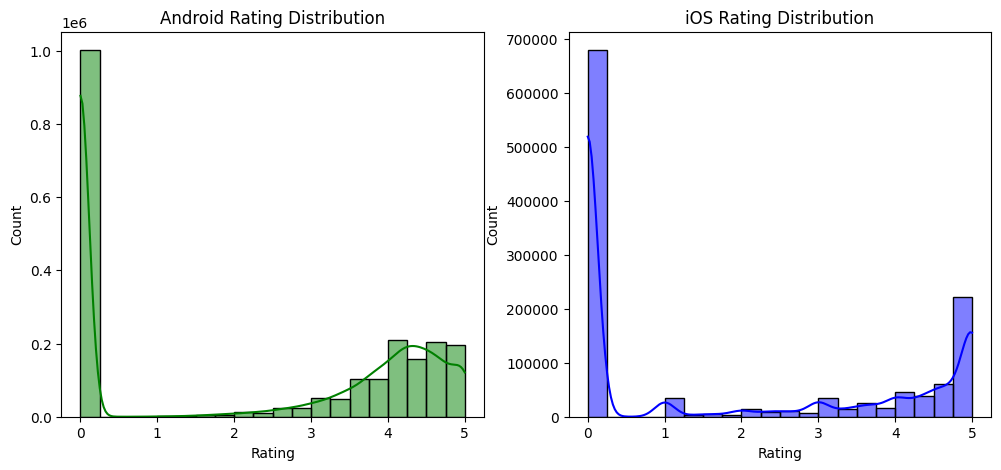

In [2]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(google_df['Rating'], kde=True, color='green', bins=20)
plt.title('Android Rating Distribution')

plt.subplot(1, 2, 2)
sns.histplot(apple_df['Rating'], kde=True, color='blue', bins=20)
plt.title('iOS Rating Distribution')

plt.show()


**Insight**: Android ratings tend to be left-skewed (mostly high), while iOS ratings might show a different pattern (e.g., more discrete steps).


### 2.2 Category Popularity


Which categories have the most apps?


/var/folders/fm/9sdqzm1j0dl2j5b180p0n7gw0000gn/T/ipykernel_21318/718269871.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cat_android.index, x=top_cat_android.values, palette='viridis')


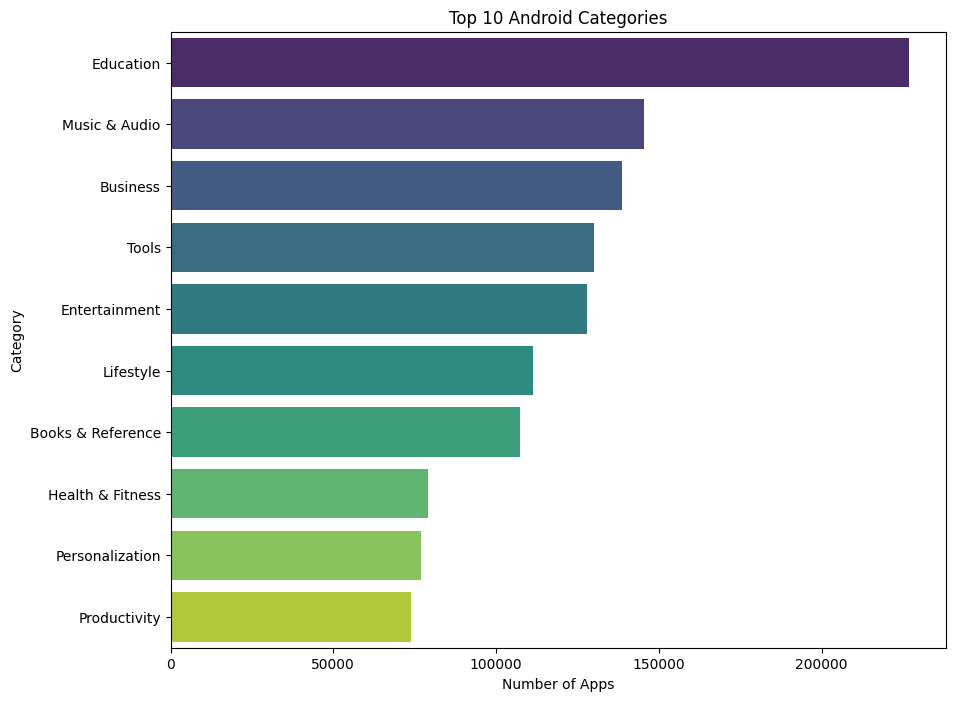

In [3]:
plt.figure(figsize=(10, 8))
top_cat_android = google_df['Category'].value_counts().head(10)
sns.barplot(y=top_cat_android.index, x=top_cat_android.values, palette='viridis')
plt.title('Top 10 Android Categories')
plt.xlabel('Number of Apps')
plt.show()


## 3. Bivariate Analysis


### 3.1 Price vs Rating


Do users rate paid apps higher? Let's verify.


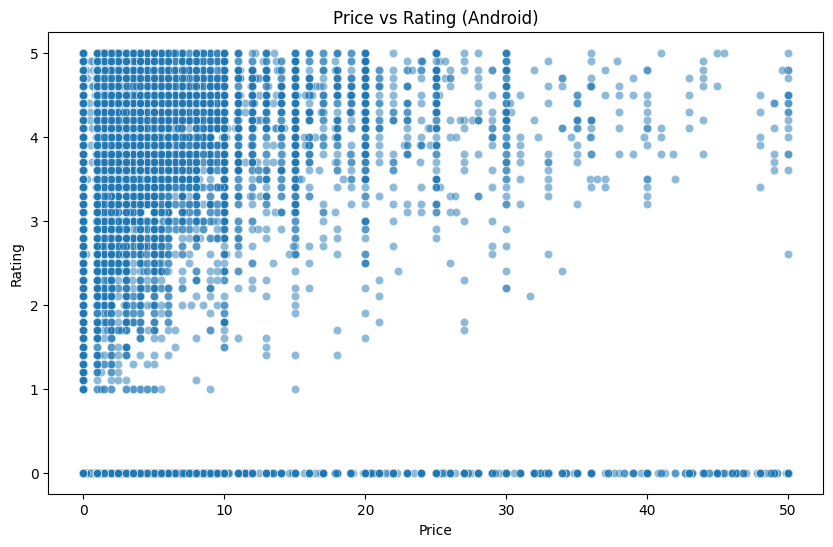

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=google_df[google_df['Price'] < 50], x='Price', y='Rating', alpha=0.5)
plt.title('Price vs Rating (Android)')
plt.show()


**Insight**: There doesn't seem to be a strong linear correlation, but very expensive apps often have few ratings.


### 3.2 Size vs Installs (Android)


Do smaller apps get more installs?


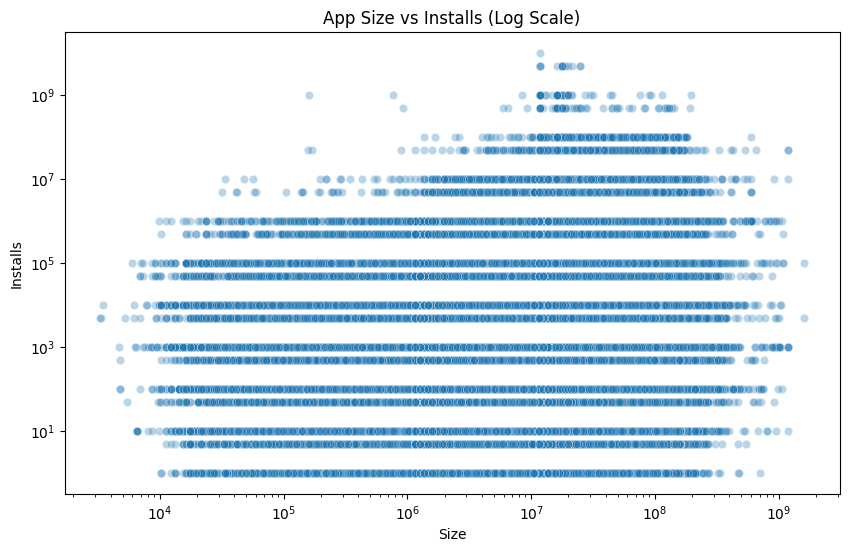

In [5]:
plt.figure(figsize=(10, 6))
# Use log scale for Installs as it spans many orders of magnitude
sns.scatterplot(data=google_df, x='Size', y='Installs', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.title('App Size vs Installs (Log Scale)')
plt.show()


## 4. Comparative Analysis (Android vs iOS)


### 4.1 Price Comparison


Which platform is more expensive?


/var/folders/fm/9sdqzm1j0dl2j5b180p0n7gw0000gn/T/ipykernel_21318/3647159769.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(google_df[google_df['Price'] > 0]['Price'], label='Android', clip=(0, 20), shade=True)
/var/folders/fm/9sdqzm1j0dl2j5b180p0n7gw0000gn/T/ipykernel_21318/3647159769.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(apple_df[apple_df['Price'] > 0]['Price'], label='iOS', clip=(0, 20), shade=True)


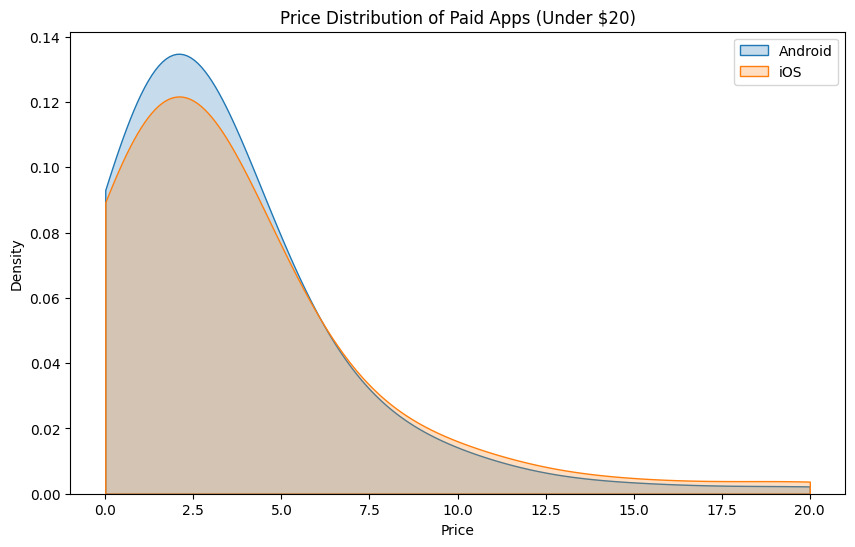

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(google_df[google_df['Price'] > 0]['Price'], label='Android', clip=(0, 20), shade=True)
sns.kdeplot(apple_df[apple_df['Price'] > 0]['Price'], label='iOS', clip=(0, 20), shade=True)
plt.title('Price Distribution of Paid Apps (Under $20)')
plt.legend()
plt.show()


**Insight**: iOS apps generally have a higher average price than Android apps.


### 4.2 Correlation Matrix


Let's look at the correlation between numerical features.


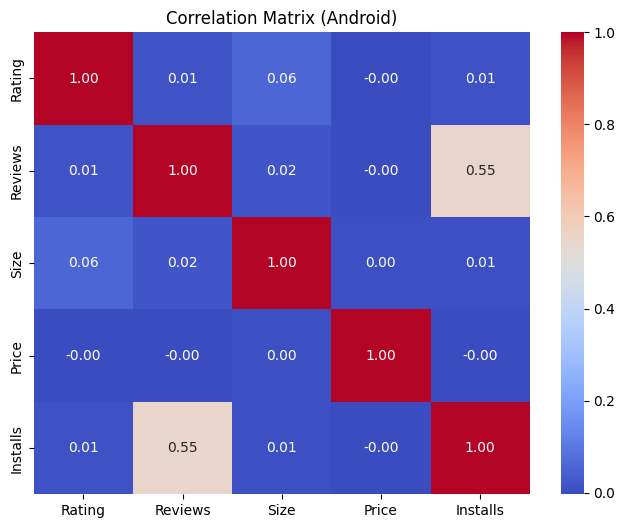

In [7]:
plt.figure(figsize=(8, 6))
corr = google_df[['Rating', 'Reviews', 'Size', 'Price', 'Installs']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Android)')
plt.show()
